# Linear Regression  Exercise

---
---
---
## Complete the tasks in bold

**TASK: Run the cells under the Imports and Data section to make sure you have imported the correct general libraries as well as the correct datasets. Later on you may need to run further imports from scikit-learn.**

### Imports

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

### Data

In [81]:
df = pd.read_csv("AMES_Final_DF.csv")

In [83]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


**TASK: The label we are trying to predict is the SalePrice column. Separate out the data into X features and y labels**

In [88]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

**TASK: Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%. To get the same data split as the solutions notebook, you can specify random_state = 101**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**TASK: The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take carefuly note of what to use for .fit() vs what to use for .transform()**

In [94]:
scaler = StandardScaler()

In [96]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**TASK: Fit the data using a Linear Regression Model**

In [99]:
model = LinearRegression()


**TASK: Evaluate your model's performance on the unseen 10% scaled test set.**

In [102]:
model.fit(X_train,y_train)

LinearRegression()

In [104]:
test_predictions = model.predict(X_test)

In [106]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [108]:
MAE

14584.742150579044

In [110]:
MSE

435074302.50634813

In [112]:
RMSE

20858.43480480614


**TASK: Repeat the above steps using Polynomial Regression and Regularization.**
**Note: Only Try one Polynomial Degree and one regularization technique.**

In [115]:
polynomial_converter = PolynomialFeatures(degree=1)

In [117]:
poly_features = polynomial_converter.fit_transform(X)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [121]:
model = LinearRegression()

In [123]:
model.fit(X_train,y_train)

LinearRegression()

In [125]:
test_predictions = model.predict(X_test)

In [127]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [129]:
MAE

15861.043509420402

In [131]:
MSE

591751956.7104579

In [133]:
RMSE

24325.952328952262

In [135]:

train_rmse_errors = []
test_rmse_errors = []

In [137]:
for d in range(1,3):
    polynomial_converter = PolynomialFeatures(degree=d)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

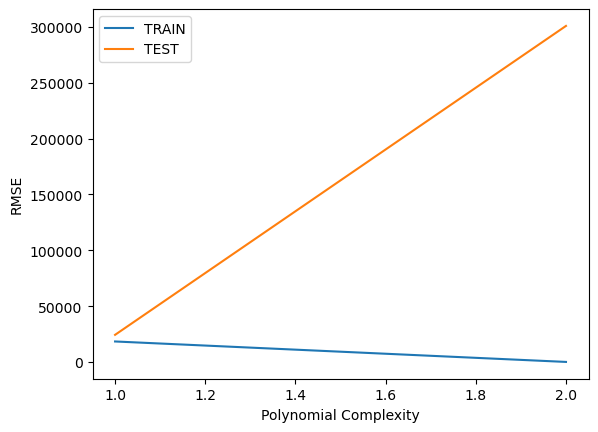

In [139]:
plt.plot(range(1,3),train_rmse_errors,label='TRAIN')
plt.plot(range(1,3),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [142]:

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_

10.0

In [143]:
test_predictions = ridge_cv_model.predict(X_test)

In [146]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [148]:
MAE

94019.8488359981

In [150]:
MSE

52671604584.27954

In [152]:
RMSE

229502.9511450333

In [154]:
ridge_cv_model.coef_

array([ 0.00000000e+00, -5.37994150e-01, -1.86877270e+02, ...,
        1.41892858e-02,  0.00000000e+00, -2.26379424e-02])

## Great work!

----